DOC constituents - EDA, pre-processing - Destination

### Which places they choose to travel?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
from palettable.colorbrewer.diverging import *

In [2]:
sns.set(style='whitegrid', palette="Spectral_r")
# dual_colors = [ '#009fca','#00f8b9'] #'#005e79',

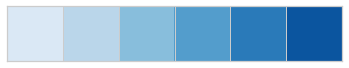

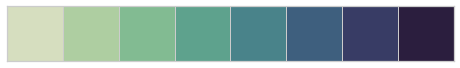

In [3]:
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
cpal = sns.color_palette("Blues")
# dual_colors = [cpal[3],cpal[2]]
# sns.set_palette(cpal)
sns.palplot(cpal)
sns.palplot(cb_pal)

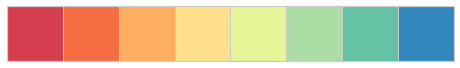

In [4]:
colors = Spectral_8.hex_colors
dual_colors = [colors[-1],colors[4]]
sns.palplot(colors)

In [5]:
df = pd.read_csv("train.csv")
df.columns = df.columns.map(lambda x: x.lower())
df.columns = df.columns.map(lambda x: x.replace(" ","_"))

In [6]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [7]:
df.destination.unique()

array(['PHILIPPINES', 'MALAYSIA', 'THAILAND', 'HONG KONG',
       'UNITED KINGDOM', 'VIET NAM', 'CHINA', 'SINGAPORE', 'JAPAN',
       'INDONESIA', 'UNITED ARAB EMIRATES', 'BRUNEI DARUSSALAM',
       'UNITED STATES', 'CANADA', 'INDIA', 'KOREA, REPUBLIC OF',
       'CAMBODIA', 'AUSTRALIA', 'MONGOLIA', 'SOUTH AFRICA', 'EGYPT',
       'CZECH REPUBLIC', 'GERMANY', 'NEPAL', 'PAKISTAN', 'FRANCE',
       'MYANMAR', 'TAIWAN, PROVINCE OF CHINA', 'SPAIN', 'NEW ZEALAND',
       'ISRAEL', 'NETHERLANDS', 'NORWAY', 'SRI LANKA', 'FINLAND',
       'IRELAND', 'ITALY', 'ICELAND', 'DENMARK', 'SAUDI ARABIA',
       'SWITZERLAND', 'MACAO', 'UKRAINE', 'PORTUGAL', 'BELGIUM',
       'HUNGARY', 'GREECE', 'MALDIVES',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'MOROCCO', 'KAZAKHSTAN',
       'TURKEY', 'MAURITIUS', 'BANGLADESH', 'PERU', 'SWEDEN', 'KENYA',
       'FIJI', 'CYPRUS', 'BRAZIL', 'RUSSIAN FEDERATION', 'MEXICO',
       'AUSTRIA', 'TANZANIA, UNITED REPUBLIC OF', 'LEBANON', 'POLAND',
       'ROMANIA', 'SLOV

In [8]:
top_5_dest = df.destination.value_counts()[:5]
top_5_dest

SINGAPORE    14242
THAILAND      4562
MALAYSIA      4359
CHINA         3909
AUSTRALIA     3011
Name: destination, dtype: int64

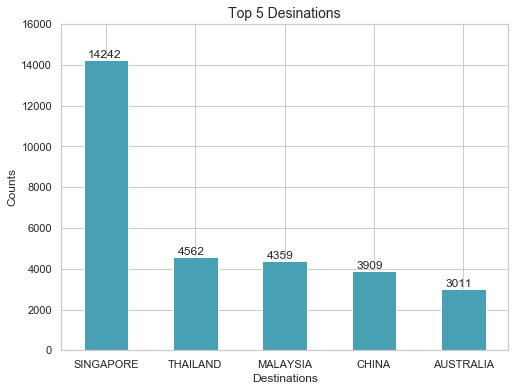

In [36]:
# _filemain
top_5_dest.plot.bar(figsize=(8,6))
for num, counts in enumerate(top_5_dest):
    plt.text(x=num-0.2,y=counts+100, s = counts)
plt.xlabel("Destinations")
plt.ylim((0,16000))
plt.ylabel("Counts")
plt.title('Top 5 Desinations',fontdict={'fontsize':14})
plt.xticks(rotation='horizontal')
plt.show()

In [10]:
top_dest_df = df[(df.destination == 'SINGAPORE')|
                 (df.destination == 'THAILAND')|
                 (df.destination == 'MALAYSIA')|
                 (df.destination == 'CHINA') |
                 (df.destination == 'AUSTRALIA')]

In [11]:
top_dest_df.shape

(30083, 11)

In [12]:
print(f"Top destinations vs other destinations = {np.round(top_dest_df.shape[0]/df.shape[0]*100,2)}%")

Top destinations vs other destinations = 57.51%


In [13]:
df.groupby(["destination"])[["claim"]].count().sort_values("claim", ascending=False)[:5]

,claim
destination,
SINGAPORE,14242
THAILAND,4562
MALAYSIA,4359
CHINA,3909
AUSTRALIA,3011


In [14]:
top_dest_claim = top_dest_df.groupby(["destination","claim"])[["claim"]].count()/top_dest_df.groupby(["destination"])[["claim"]].count()*100

In [15]:
top_dest_claim

claim
destination claim           
AUSTRALIA   0      84.888741
            1      15.111259
CHINA       0      83.576362
            1      16.423638
MALAYSIA    0      96.306492
            1       3.693508
SINGAPORE   0      62.743997
            1      37.256003
THAILAND    0      89.960544
            1      10.039456

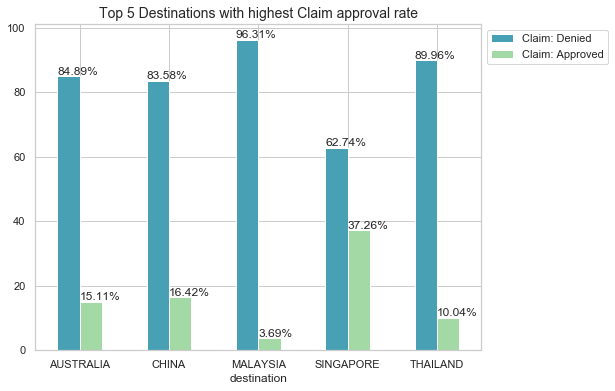

In [37]:
ax = top_dest_claim.unstack().plot.bar(figsize=(8,6))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+"%", (x,y+h+.5))
plt.title('Top 5 Destinations with highest Claim approval rate',fontdict={'fontsize':14})
plt.legend(['Claim: Denied','Claim: Approved'],bbox_to_anchor=(1,1))
plt.xticks(rotation='horizontal')

plt.show()

In [27]:
df.groupby(['agency_type'])['destination'].value_counts()

agency_type    destination                     
Airlines       SINGAPORE                           11412
               CHINA                                 921
               THAILAND                              757
               INDIA                                 624
               BRUNEI DARUSSALAM                     520
               MALAYSIA                              450
               HONG KONG                             438
               INDONESIA                             423
               PHILIPPINES                           380
               VIET NAM                              210
               JAPAN                                 176
               KOREA, REPUBLIC OF                    168
               MYANMAR                               158
               AUSTRALIA                             149
               TAIWAN, PROVINCE OF CHINA             131
               UNITED STATES                          68
               CAMBODIA                 

#### Agency Type

In [39]:
pd.DataFrame(df.groupby(['agency_type'])['destination'].value_counts())

destination
agency_type   destination                                  
Airlines      SINGAPORE                               11412
              CHINA                                     921
              THAILAND                                  757
              INDIA                                     624
              BRUNEI DARUSSALAM                         520
              MALAYSIA                                  450
              HONG KONG                                 438
              INDONESIA                                 423
              PHILIPPINES                               380
              VIET NAM                                  210
              JAPAN                                     176
              KOREA, REPUBLIC OF                        168
              MYANMAR                                   158
              AUSTRALIA                                 149
              TAIWAN, PROVINCE OF CHINA                 131
              UNITED STATES                              68
              CAMBODIA                                   37
              UNITED ARAB EMIRATES                       37
              UNITED KINGDOM                             37
              SRI LANKA                                  26
              MACAO                                      19
              NEW ZEALAND                                18
              CANADA                                     17
              FRANCE                                     15
              GERMANY                                    14
              NETHERLANDS                                13
              LAO PEOPLE'S DEMOCRATIC REPUBLIC           12
              NEPAL                                      10
              ITALY                                       9
              SPAIN                                       7
...                                                     ...
Travel Agency QATAR                                       9
              UKRAINE                                     9
              BAHRAIN                                     8
              FIJI                                        8
              LUXEMBOURG                                  8
              MAURITIUS                                   8
              OMAN                                        8
              CHILE                                       7
              GEORGIA                                     7
              SLOVENIA                                    7
              UZBEKISTAN                                  7
              AZERBAIJAN                                  6
              ESTONIA                                     6
              JORDAN                                      6
              BOLIVIA                                     5
              GUAM                                        5
              KUWAIT                                      5
              COSTA RICA                                  4
              KYRGYZSTAN                                  4
              TUNISIA                                     4
              VENEZUELA                                   4
              ETHIOPIA                                    3
              LEBANON                                     3
              VANUATU                                     3
              BELARUS                                     2
              BERMUDA                                     2
              BHUTAN                                      2
              LITHUANIA                                   2
              TURKMENISTAN                                1
              ZAMBIA                                      1

[153 rows x 1 columns]